In [9]:
import matplotlib.pyplot as plt
import matplotlib as mpl

import astropy.units as u
import astropy.wcs as ap_wcs
from astropy.io import fits
import reproject

In [2]:
ext_map = fits.open('https://lambda.gsfc.nasa.gov/data/foregrounds/SFD/' + 
                    'lambda_sfd_ebv.fits')
ext_map.writeto('Data/Schlegel_extinction_map.fits', overwrite=True)

In [4]:
hdu_ext_map = fits.open('Data/Schlegel_extinction_map.fits', mode='update')
hdu_ext_map[1].header['COORDSYS'] = 'Galactic'
hdu_ext_map.flush()

In [5]:
target_header = fits.Header.fromstring("""
NAXIS   =                    2
NAXIS1  =                 6288
NAXIS2  =                 3144
CTYPE1  = 'GLON-MOL'
CRPIX1  =                 3144
CRVAL1  =                  0.0
CDELT1  =              -0.1145
CUNIT1  = 'deg     '
CTYPE2  = 'GLAT-MOL'
CRPIX2  =                 1572
CRVAL2  =                  0.0
CDELT2  =               0.1145
CUNIT2  = 'deg     '
COORDSYS= 'Galactic'
""", sep='\n')
array, footprint = reproject.reproject_from_healpix('Data/Schlegel_extinction_map.fits', 
                                                    target_header, nested=True, hdu_in=1)

/usr/local/lib/python3.6/dist-packages/astropy_healpix/core.py:519: RuntimeWarning: invalid value encountered in bilinear_interpolation_weights
  result = _core.bilinear_interpolation_weights(lon, lat, nside)
/usr/local/lib/python3.6/dist-packages/astropy_healpix/core.py:484: RuntimeWarning: invalid value encountered in ring_to_nested
  return _core.ring_to_nested(ring_index, nside)


In [6]:
prim_hdu = fits.PrimaryHDU(data=array, header=target_header)
prim_hdu.writeto('Data/reprojected_Schlegel_extinction_map.fits', overwrite=True)

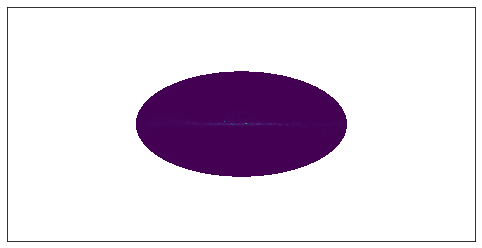

In [14]:
reproj_ima = fits.open('Data/reprojected_Schlegel_extinction_map.fits')
wcs = ap_wcs.WCS(reproj_ima[0].header)

fig = plt.figure(figsize=(10, 8.0))
ax1 = fig.add_axes([0.17, 0.17, 0.65, 0.77], projection=wcs)
ax1.imshow(reproj_ima[0].data[ :, :], origin='lower', cmap=mpl.cm.viridis)
lon, lat = ax1.coords[0], ax1.coords[1]
lon.set_major_formatter('hh:mm:ss.s')
lat.set_major_formatter('dd:mm')
lon.set_ticklabel(exclude_overlapping=True)
lat.set_ticklabel(exclude_overlapping=True)
ax1.set_xlabel('RA')
ax1.set_ylabel('Dec')